In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
temp = open('OregonHousePrice/ex3x.dat').read().splitlines()

features = []
for t in temp:
    f = [float(t.split('   ')[1]),float(t.split('   ')[2])]
    features.append(f)
features = np.asarray(features)

In [3]:
temp = open('OregonHousePrice/ex3y.dat').read().splitlines()

predictor = []
for t in temp:
    p = float(t.split('   ')[1])
    predictor.append(p)
features = np.c_[features,predictor]

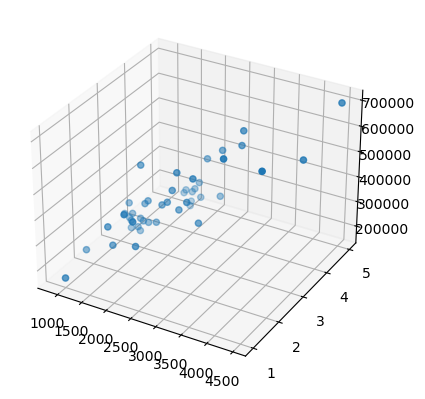

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(features[:,0], features[:,1], features[:,2])

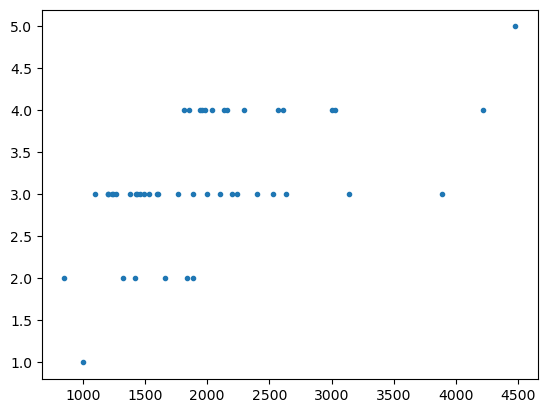

In [23]:
plt.plot(features[:,0],features[:,1],'.')

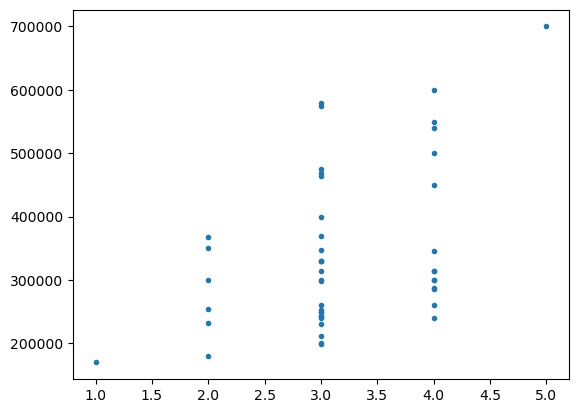

In [24]:
plt.plot(features[:,1],features[:,2],'.')

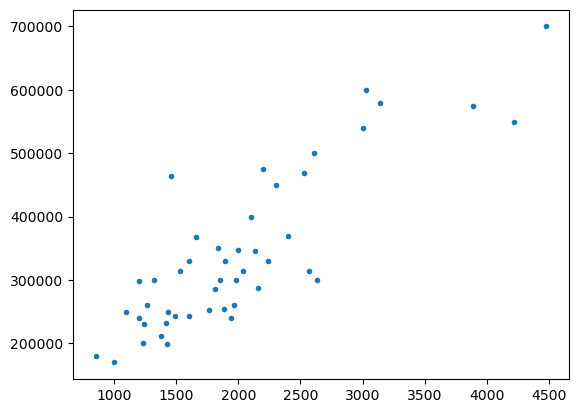

In [25]:
plt.plot(features[:,0],features[:,2],'.')

In [5]:
[features[22,0],features[22,2]]

[1604.0, 242900.0]

In [6]:
a_point = [features[22,0],features[22,2]]
a_vector = np.asarray([[0,0],a_point])
plt.plot(b[:,0],b[:,1])
plt.plot(a_point[0],a_point[1],'-+')

plt.grid('on')

NameError: name 'b' is not defined

In [7]:
features = features-np.mean(features,0)

In [8]:
features = features/np.std(features,0)

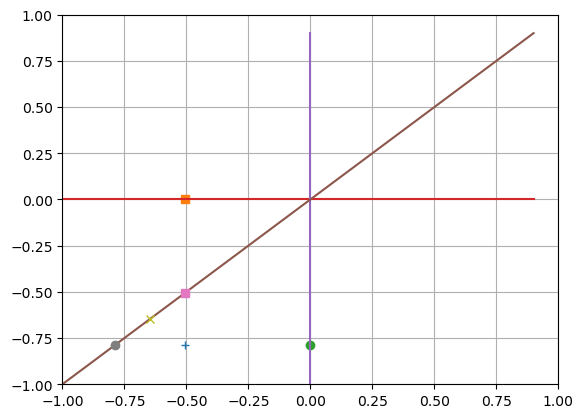

In [10]:
a_point = [features[22,0],features[22,2]]
plt.plot(a_point[0],a_point[1],'+')
plt.plot(a_point[0],0,'s')
plt.plot(0,a_point[1],'o')
plt.grid('on')
plt.xlim([-1,1])
plt.ylim([-1,1])

x = np.arange(-1,1,0.1)
plt.plot(x,np.zeros_like(x),'-')
plt.plot(np.zeros_like(x),x,'-')
y = x
plt.plot(x,y,'-')
plt.plot(a_point[0],a_point[0],'s')
plt.plot(a_point[1],a_point[1],'o')
plt.plot((a_point[0]+a_point[1])/2,(a_point[0]+a_point[1])/2,'x')

In [11]:
features2D = np.c_[features[:,0],features[:,2]]

In [12]:
M = [[(1/2), (1/2) ]]

In [13]:
StupidProject = np.matmul(M,features2D.T)

In [14]:
StupidProject.shape

(1, 47)

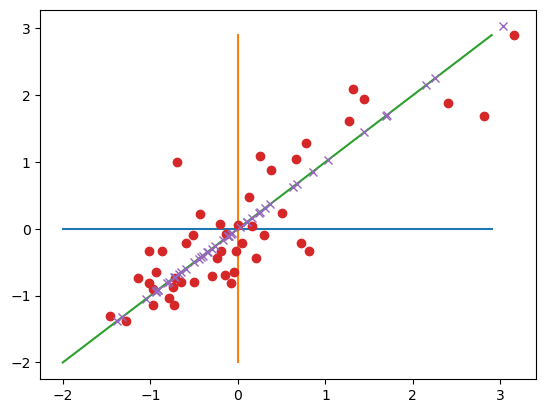

In [15]:
x = np.arange(-2,3,0.1)
plt.plot(x,np.zeros_like(x),'-')
plt.plot(np.zeros_like(x),x,'-')
y = x
plt.plot(x,y,'-')
plt.plot(features2D[:,0],features2D[:,1],'o')
plt.plot(StupidProject[0,:],StupidProject[0,:],'x')

In [16]:
M = [[1, 0 , 0 ],[0,1, 0]]

In [17]:
StupidProject = np.matmul(M,features.T)

In [18]:
StupidProject.shape

(2, 47)

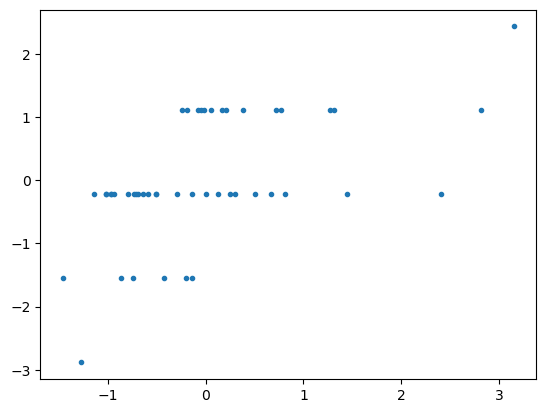

In [19]:
plt.plot(StupidProject[0,:], StupidProject[1,:],'.')

In [20]:
M = [[1, -1 , 0 ],[1,1, 0]]

In [21]:
StupidProject = np.matmul(M,features.T)

In [22]:
StupidProject.shape

(2, 47)

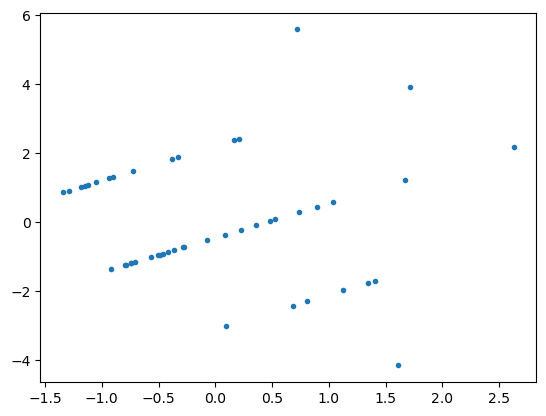

In [23]:
plt.plot(StupidProject[0,:], StupidProject[1,:],'.')

In [27]:
Sigma = np.cov(features.T)

In [28]:
Sigma.shape

(3, 3)

In [29]:
E, U = np.linalg.eig(Sigma)

In [30]:
E

array([2.30496638, 0.13586337, 0.62438764])

In [31]:
U

array([[-0.62905046, -0.74020075,  0.23748339],
       [-0.49231563,  0.14291704, -0.85860354],
       [-0.60159857,  0.65702174,  0.45431443]])

In [32]:
M = np.c_[U[:,0], U[:,2]]

In [33]:
M

array([[-0.62905046,  0.23748339],
       [-0.49231563, -0.85860354],
       [-0.60159857,  0.45431443]])

In [34]:
M.shape

(3, 2)

In [35]:
GoodProject = np.matmul(M.T,features.T)

In [36]:
GoodProject.shape

(2, 47)

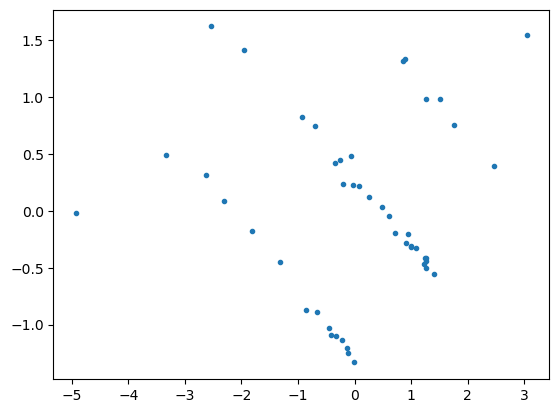

In [37]:
plt.plot(GoodProject[0,:],GoodProject[1,:],'.')

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=2)

In [40]:
BestProject = pca.fit_transform(features)

In [41]:
BestProject.shape

(47, 2)

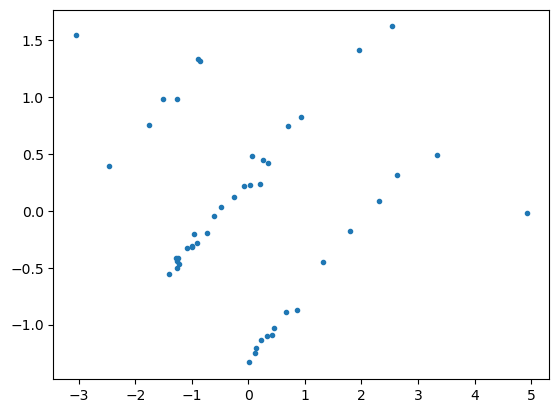

In [42]:
plt.plot(BestProject[:,0],BestProject[:,1],'.')

In [159]:
rng = np.random.RandomState(0)

n_samples = 5000
cov = [[3, 3], [3, 4]]
cov1 = [[2,-1], [-1, 2]]
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)#+rng.multivariate_normal(mean=[1, 1], cov=cov1, size=n_samples)

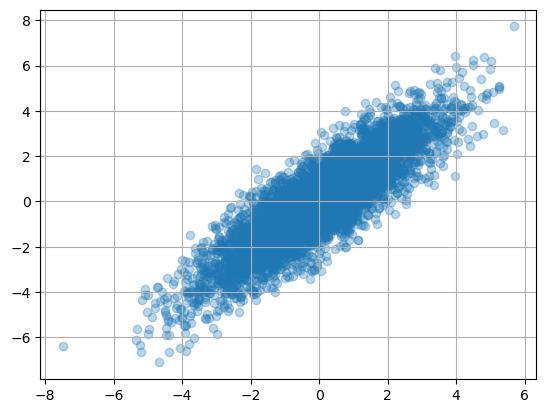

In [161]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
plt.grid('on')

In [129]:
pca = PCA(n_components=2).fit(X)
Y = pca.transform(X)

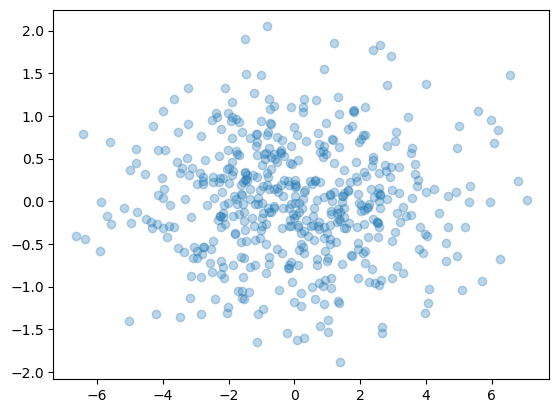

In [130]:
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.3, label="samples")

In [83]:
pca.explained_variance_

array([6.21234881, 0.45942259])

In [84]:
pca.components_

array([[-0.64402153, -0.76500736],
       [ 0.76500736, -0.64402153]])

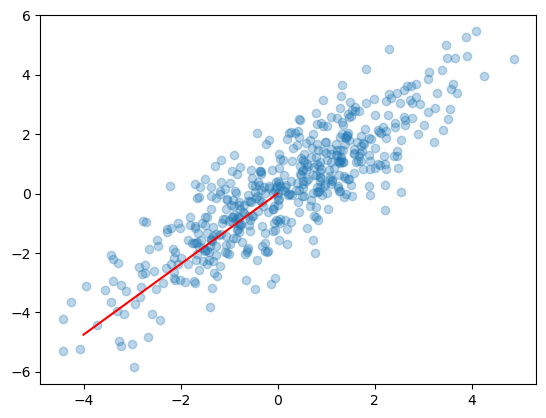

In [93]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
plt.plot([0,pca.components_[0][0]*pca.explained_variance_[0]],[0,pca.components_[0][1]*pca.explained_variance_[0]],'-r')

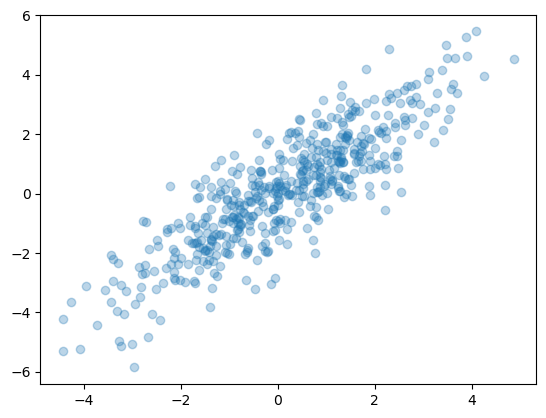

In [132]:
XX = pca.inverse_transform(Y)
plt.scatter(XX[:, 0], XX[:, 1], alpha=0.3, label="samples")

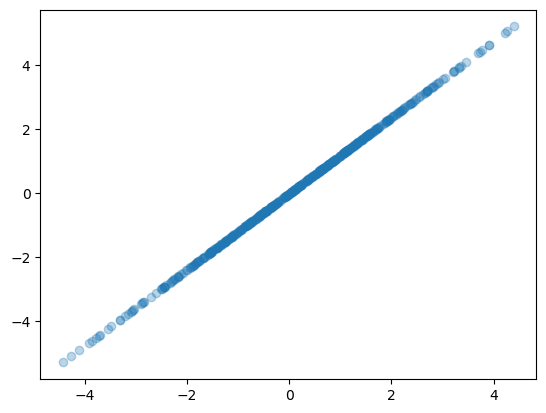

In [140]:
YY = Y.copy()
YY[:,1] = 0
XX = pca.inverse_transform(YY)
plt.scatter(XX[:, 0], XX[:, 1], alpha=0.3, label="samples")

In [136]:
np.mean((XX-X)**2)

0.22925187206864792

In [137]:
XXX = X.copy()
XXX[:,1] = 0
np.mean((XXX-X)**2)

1.9160879651717568

In [138]:
XXX = X.copy()
XXX[:,0] = 0
np.mean((XXX-X)**2)

1.4272455741452272

In [81]:
y = X.dot(pca.components_[1]) + rng.normal(size=n_samples) / 2

In [164]:
y = X.dot(pca.components_[1]) + rng.normal(size=n_samples) / 2

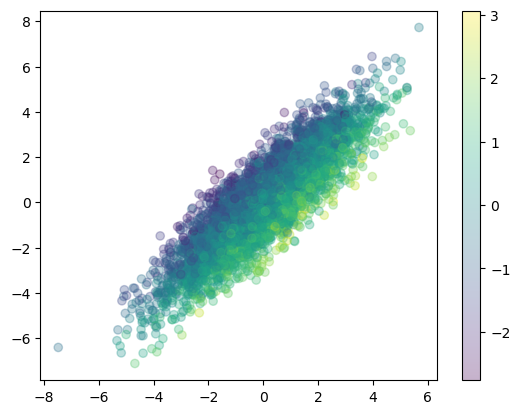

In [166]:
plt.scatter(X[:,0],X[:,1],alpha=0.3,c=y)
plt.colorbar()

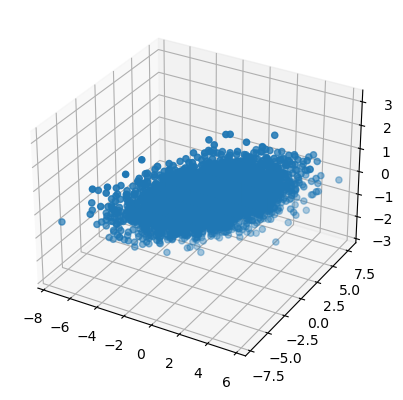

In [167]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], y)

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)

In [171]:
from sklearn.linear_model import LinearRegression

In [172]:
lr = LinearRegression()

In [173]:
lr.fit(X_train,y_train)

LinearRegression()

In [174]:
haty_test = lr.predict(X_test)

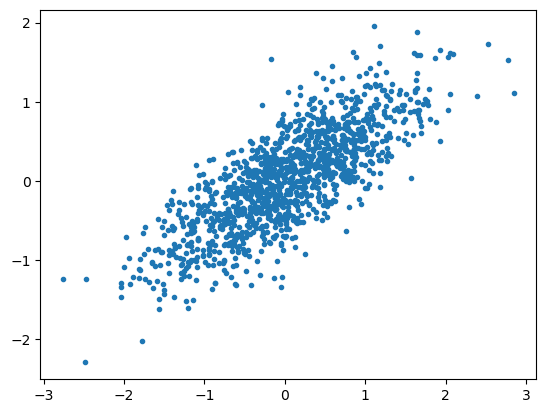

In [175]:
plt.plot(y_test,haty_test,'.')

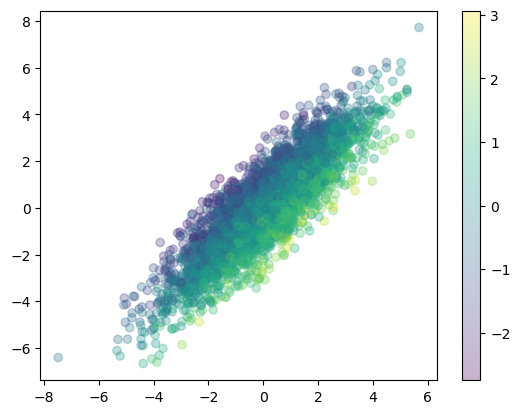

In [176]:
plt.scatter(X_train[:,0],X_train[:,1],alpha=0.3,c=y_train)
plt.colorbar()

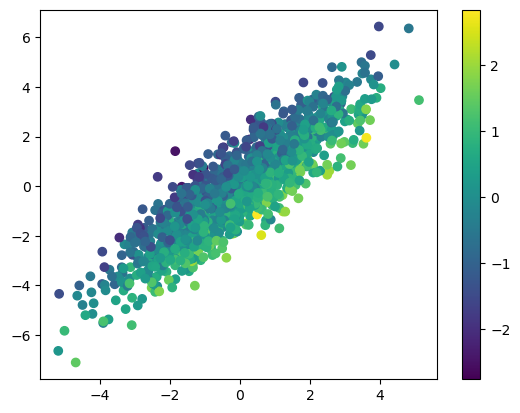

In [177]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.colorbar()

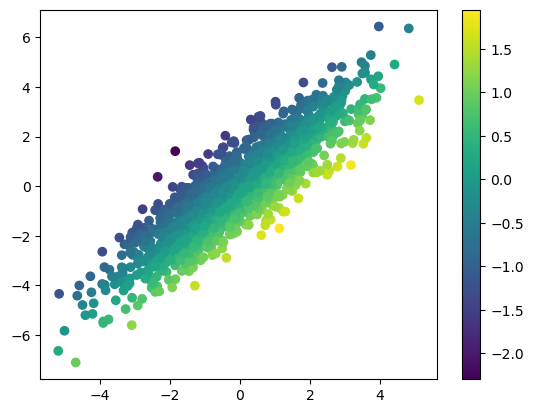

In [178]:
plt.scatter(X_test[:,0],X_test[:,1],c=haty_test)
plt.colorbar()